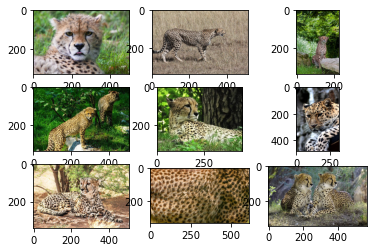

In [3]:
from matplotlib import pyplot
from matplotlib.image import imread
folder = 'Animals/Cheetah/'
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	filename = folder + 'Cheetah.' + str(i) + '.jpg'
	image = imread(filename)
	pyplot.imshow(image)
pyplot.show()

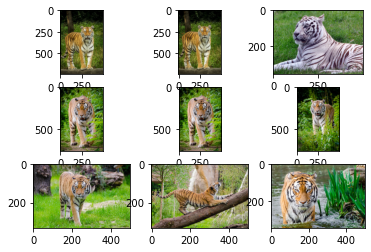

In [6]:
from matplotlib import pyplot
from matplotlib.image import imread
folder = 'Animals/Tiger/'
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	filename = folder + 'Tiger.' + str(i) + '.jpeg'
	image = imread(filename)
	pyplot.imshow(image)
pyplot.show()

In [8]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
folder = 'train/'
photos, labels = list(), list()
for file in listdir(folder):
	output = 0.0
	if file.startswith('Cheetah'):
		output = 1.0
	photo = load_img(folder + file, target_size=(200, 200))
	photo = img_to_array(photo)
	photos.append(photo)
	labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('cheetahs_vs_tigers_photos.npy', photos)
save('cheetahs_vs_tigers_labels.npy', labels)

(77, 200, 200, 3) (77,)


In [9]:
# load and confirm the shape
from numpy import load
photos = load('cheetahs_vs_tigers_photos.npy')
labels = load('cheetahs_vs_tigers_labels.npy')
print(photos.shape, labels.shape)

(77, 200, 200, 3) (77,)


In [37]:
# create directories
dataset_home = 'dataset_cheetahs_vs_tigers/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	labeldirs = ['cheetahs/', 'tigers/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)

In [38]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
dataset_home = 'dataset_cheetahs_vs_tigers/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	labeldirs = ['cheetahs/', 'tigers/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
seed(1)
val_ratio = 0.25
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cheetah'):
		dst = dataset_home + dst_dir + 'cheetahs/'  + file
		copyfile(src, dst)
	elif file.startswith('Tiger'):
		dst = dataset_home + dst_dir + 'tigers/'  + file
		copyfile(src, dst)

In [78]:
# Baseline CNN Model with One CNN Block (VGG-style architecture)
import sys
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
def summarize_diagnostics(history):
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
def run_test_harness():
	model = define_model()
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	train_it = datagen.flow_from_directory('dataset_cheetahs_vs_tigers/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_cheetahs_vs_tigers/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	summarize_diagnostics(history)
 
run_test_harness()

Found 56 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
> 42.857


In [81]:
# CNN Model with Two CNN Block
import sys
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
def summarize_diagnostics(history):
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
def run_test_harness():
	model = define_model()
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	train_it = datagen.flow_from_directory('dataset_cheetahs_vs_tigers/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_cheetahs_vs_tigers/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	summarize_diagnostics(history)
 
run_test_harness()

Found 56 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
> 47.619


In [75]:
# CNN Model with Three CNN Block
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
def summarize_diagnostics(history):
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
def run_test_harness():
	model = define_model()
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	train_it = datagen.flow_from_directory('dataset_cheetahs_vs_tigers/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_cheetahs_vs_tigers/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	summarize_diagnostics(history)
 
run_test_harness()

Found 56 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
> 66.667
